<a href="https://colab.research.google.com/github/itayko2/PremierLeague-EDA/blob/main/PremierLeague_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 2000)
pd.set_option("mode.chained_assignment", None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style({'font.family':'Sofia Pro'})
flatui = ["#8B0ABE",  "#4989F5", "#FE2665", "#F28201", "#FFB624" ,"#e74c3c", "#34495e"]  # ,'gold', "deeppink", "#3498db", "#95a5a6",  "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "darkviolet",
sns.set_palette(flatui)

In [2]:
players_df = pd.read_csv("https://raw.githubusercontent.com/itayko2/PremierLeague-EDA/main/players.csv")

In [3]:
positions_df = pd.read_csv("https://raw.githubusercontent.com/itayko2/PremierLeague-EDA/main/positions.csv")

In [49]:
teams_df = pd.read_csv("https://raw.githubusercontent.com/itayko2/PremierLeague-EDA/main/teams.csv")

In [5]:
players_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Playing Time,Playing Time.1,Playing Time.2,...,Expected.1,Expected.2,Expected.3,Per 90 Minutes.5,Per 90 Minutes.6,Per 90 Minutes.7,Per 90 Minutes.8,Per 90 Minutes.9,Unnamed: 32,#NAME?
0,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,npxG,xA,npxG+xA,xG,xA,xG+xA,npxG,npxG+xA,Matches,-9999
1,1,Max Aarons,eng ENG,DF,Norwich City,21,2000,34,32,2881,...,0.7,1.4,2.1,0.02,0.04,0.07,0.02,0.07,Matches,774cf58b
2,2,Che Adams,sct SCO,FW,Southampton,25,1996,30,23,2039,...,7.1,2.6,9.7,0.31,0.12,0.43,0.31,0.43,Matches,f2bf1b0f
3,3,Rayan A√Øt Nouri,fr FRA,DF,Wolves,20,2001,23,20,1828,...,0.7,1.3,2.1,0.04,0.07,0.1,0.04,0.1,Matches,9b398aea
4,4,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,24,23,1995,...,0.8,1.4,2.2,0.04,0.06,0.1,0.04,0.1,Matches,a8c0acb7


In [6]:
players_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Playing Time', 'Playing Time.1',
       'Playing Time.2', 'Playing Time.3', 'Performance', 'Performance.1',
       'Performance.2', 'Performance.3', 'Performance.4', 'Performance.5',
       'Performance.6', 'Per 90 Minutes', 'Per 90 Minutes.1',
       'Per 90 Minutes.2', 'Per 90 Minutes.3', 'Per 90 Minutes.4', 'Expected',
       'Expected.1', 'Expected.2', 'Expected.3', 'Per 90 Minutes.5',
       'Per 90 Minutes.6', 'Per 90 Minutes.7', 'Per 90 Minutes.8',
       'Per 90 Minutes.9', 'Unnamed: 32', '#NAME?'],
      dtype='object')

In [9]:
columns = players_df.columns
dict_columns = dict(zip(columns, players_df.iloc[0]))
print(dict_columns)

{'Unnamed: 0': 'Rk', 'Unnamed: 1': 'Player', 'Unnamed: 2': 'Nation', 'Unnamed: 3': 'Pos', 'Unnamed: 4': 'Squad', 'Unnamed: 5': 'Age', 'Unnamed: 6': 'Born', 'Playing Time': 'MP', 'Playing Time.1': 'Starts', 'Playing Time.2': 'Min', 'Playing Time.3': '90s', 'Performance': 'Gls', 'Performance.1': 'Ast', 'Performance.2': 'G-PK', 'Performance.3': 'PK', 'Performance.4': 'PKatt', 'Performance.5': 'CrdY', 'Performance.6': 'CrdR', 'Per 90 Minutes': 'Gls', 'Per 90 Minutes.1': 'Ast', 'Per 90 Minutes.2': 'G+A', 'Per 90 Minutes.3': 'G-PK', 'Per 90 Minutes.4': 'G+A-PK', 'Expected': 'xG', 'Expected.1': 'npxG', 'Expected.2': 'xA', 'Expected.3': 'npxG+xA', 'Per 90 Minutes.5': 'xG', 'Per 90 Minutes.6': 'xA', 'Per 90 Minutes.7': 'xG+xA', 'Per 90 Minutes.8': 'npxG', 'Per 90 Minutes.9': 'npxG+xA', 'Unnamed: 32': 'Matches', '#NAME?': '-9999'}


In [13]:
for key in dict_columns:
  if not key.startswith('Unnamed'):
      dict_columns[key] = key.split(".")[0] + "." + dict_columns[key]

print(dict_columns)

{'Unnamed: 0': 'Rk', 'Unnamed: 1': 'Player', 'Unnamed: 2': 'Nation', 'Unnamed: 3': 'Pos', 'Unnamed: 4': 'Squad', 'Unnamed: 5': 'Age', 'Unnamed: 6': 'Born', 'Playing Time': 'Playing Time.MP', 'Playing Time.1': 'Playing Time.Starts', 'Playing Time.2': 'Playing Time.Min', 'Playing Time.3': 'Playing Time.90s', 'Performance': 'Performance.Gls', 'Performance.1': 'Performance.Ast', 'Performance.2': 'Performance.G-PK', 'Performance.3': 'Performance.PK', 'Performance.4': 'Performance.PKatt', 'Performance.5': 'Performance.CrdY', 'Performance.6': 'Performance.CrdR', 'Per 90 Minutes': 'Per 90 Minutes.Gls', 'Per 90 Minutes.1': 'Per 90 Minutes.Ast', 'Per 90 Minutes.2': 'Per 90 Minutes.G+A', 'Per 90 Minutes.3': 'Per 90 Minutes.G-PK', 'Per 90 Minutes.4': 'Per 90 Minutes.G+A-PK', 'Expected': 'Expected.xG', 'Expected.1': 'Expected.npxG', 'Expected.2': 'Expected.xA', 'Expected.3': 'Expected.npxG+xA', 'Per 90 Minutes.5': 'Per 90 Minutes.xG', 'Per 90 Minutes.6': 'Per 90 Minutes.xA', 'Per 90 Minutes.7': 'Pe

In [14]:
players_df.rename(columns = dict_columns, inplace = True)


In [15]:
players_df = players_df.iloc[1: , :]

In [ ]:
players_df['Nation'] = players_df['Nation'].apply(lambda x: x.split()[1])

In [32]:
players_df = players_df.astype({"Performance.Ast": int, "Performance.Gls": int})

In [33]:
players_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,Playing Time.MP,Playing Time.Starts,Playing Time.Min,...,Expected.npxG,Expected.xA,Expected.npxG+xA,Per 90 Minutes.xG,Per 90 Minutes.xA,Per 90 Minutes.xG+xA,Per 90 Minutes.npxG,Per 90 Minutes.npxG+xA,Matches,#NAME?.-9999
1,1,Max Aarons,ENG,DF,Norwich City,21,2000,34,32,2881,...,0.7,1.4,2.1,0.02,0.04,0.07,0.02,0.07,Matches,774cf58b
2,2,Che Adams,SCO,FW,Southampton,25,1996,30,23,2039,...,7.1,2.6,9.7,0.31,0.12,0.43,0.31,0.43,Matches,f2bf1b0f
3,3,Rayan A√Øt Nouri,FRA,DF,Wolves,20,2001,23,20,1828,...,0.7,1.3,2.1,0.04,0.07,0.1,0.04,0.1,Matches,9b398aea
4,4,Kristoffer Ajer,NOR,DF,Brentford,23,1998,24,23,1995,...,0.8,1.4,2.2,0.04,0.06,0.1,0.04,0.1,Matches,a8c0acb7
5,5,Nathan Ak√©,NED,DF,Manchester City,26,1995,14,10,923,...,1.1,0.5,1.6,0.11,0.05,0.16,0.11,0.16,Matches,eaeca114


In [50]:
teams_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Playing Time,Unnamed: 5,Unnamed: 6,Unnamed: 7,Performance,Unnamed: 9,...,Unnamed: 19,Expected,Unnamed: 21,Unnamed: 22,Unnamed: 23,Per 90 Minutes.1,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A-PK,xG,npxG,xA,npxG+xA,xG,xA,xG+xA,npxG,npxG+xA
1,Arsenal,27,24.4,53.2,38,418,"3,420",38,60,41,...,2.53,59.9,54,36.8,90.8,1.58,0.97,2.54,1.42,2.39
2,Aston Villa,31,26.1,46.5,38,418,"3,420",38,50,42,...,2.34,44,41.8,33.6,75.4,1.16,0.88,2.04,1.1,1.98
3,Brentford,29,25.4,44.5,38,418,"3,420",38,46,33,...,1.92,47.8,43.3,33,76.2,1.26,0.87,2.13,1.14,2.01
4,Brighton,26,26.2,54.7,38,418,"3,420",38,40,30,...,1.74,46,40.7,29.1,69.8,1.21,0.77,1.98,1.07,1.84


In [42]:
teams_df = teams_df.iloc[1: , :]

In [43]:
teams_df.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A-PK,xG,npxG,xA,npxG+xA,xG,xA,xG+xA,npxG,npxG+xA
1,Arsenal,27,24.4,53.2,38,418,"3,420",38,60,41,...,2.53,59.9,54,36.8,90.8,1.58,0.97,2.54,1.42,2.39
2,Aston Villa,31,26.1,46.5,38,418,"3,420",38,50,42,...,2.34,44,41.8,33.6,75.4,1.16,0.88,2.04,1.1,1.98
3,Brentford,29,25.4,44.5,38,418,"3,420",38,46,33,...,1.92,47.8,43.3,33,76.2,1.26,0.87,2.13,1.14,2.01
4,Brighton,26,26.2,54.7,38,418,"3,420",38,40,30,...,1.74,46,40.7,29.1,69.8,1.21,0.77,1.98,1.07,1.84
5,Burnley,23,28.5,39.8,38,418,"3,420",38,32,26,...,1.5,39,37.4,27.7,65.1,1.03,0.73,1.75,0.99,1.71


In [13]:
positions_df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,"52,774",Kevin De Bruyne - 15,Ederson,→ Champions League via league finish
1,2,Liverpool,38,28,8,2,94,26,68,92,2.42,89.2,34.3,55.0,1.45,"53,352",Mohamed Salah - 23,Alisson,→ Champions League via league finish
2,3,Chelsea,38,21,11,6,76,33,43,74,1.95,67.2,36.0,31.3,0.82,"36,443",Mason Mount - 11,Edouard Mendy,→ Champions League via league finish
3,4,Tottenham,38,22,5,11,69,40,29,71,1.87,65.1,39.4,25.8,0.68,"56,523",Son Heung-min - 23,Hugo Lloris,→ Champions League via league finish
4,5,Arsenal,38,22,3,13,61,48,13,69,1.82,59.9,47.1,12.8,0.34,"59,665",Bukayo Saka - 11,Aaron Ramsdale,→ Europa League via league finish


#Contribution by nation

In [137]:
threshold = 7
df_to_plot = players_df.groupby('Nation', as_index=False)['Gls'].count().sort_index()
df_to_plot = df_to_plot.loc[:,~df_to_plot.T.duplicated(keep='first')]
df_to_plot['Nation'] = df_to_plot['Nation'].where(df_to_plot.Gls > threshold, 'OTHER')
other_sum = int(df_to_plot[df_to_plot['Nation'] == 'OTHER']['Gls'].sum())

In [138]:
df_to_plot = df_to_plot.drop(df_to_plot[df_to_plot.Gls < threshold + 1].index)
df_to_plot = df_to_plot.append({'Nation': 'OTHER', 'Gls': other_sum}, ignore_index = True)

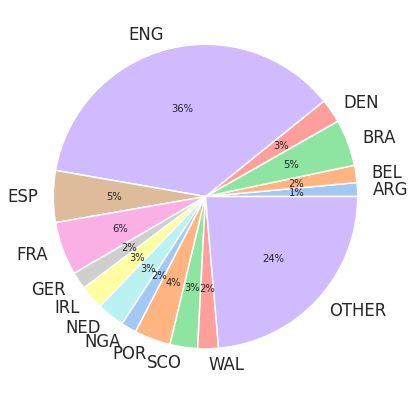

In [143]:
#create pie chart
data = list(df_to_plot['Gls'])
labels = list(df_to_plot['Nation'])
colors = sns.color_palette('pastel')[0:12]

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels, colors=colors, autopct='%.0f%%')
 
# show plot
plt.show()

## Conclutions: 
We can see that English players scored the most goals about 36%
afterwards are the Spanish,French and Brazilian players

Which player has contributed the most goals and assists to his team ?

In [35]:
df2 = players_df[['Player','Pos','Squad','Age','Performance.Ast', 'Performance.Gls']]


In [36]:
df2["G+A"] = players_df["Performance.Ast"] + players_df["Performance.Gls"]

In [40]:
teams_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Playing Time',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Performance', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Per 90 Minutes', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Expected', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Per 90 Minutes.1', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [52]:
df3 = positions_df[["Squad", "GF"]]

In [53]:
df3.head()

,Squad,GF
0,Manchester City,99
1,Liverpool,94
2,Chelsea,76
3,Tottenham,69
4,Arsenal,61


In [98]:
df_merge_col = pd.merge(df2, df3, on='Squad')

In [99]:
df_merge_col.head()

,Player,Pos,Squad,Age,Performance.Ast,Performance.Gls,G+A,GF
0,Max Aarons,DF,Norwich City,21,2,0,2,23
1,Sam Byram,DF,Norwich City,27,0,0,0,23
2,Todd Cantwell,FWMF,Norwich City,23,0,0,0,23
3,Kieran Dowell,FWMF,Norwich City,23,1,1,2,23
4,Dimitris Giannoulis,DF,Norwich City,25,1,0,1,23


In [110]:
df_merge_col["Gls/Total"] = df_merge_col["G+A"] /  df_merge_col["GF"]
df_merge_col.loc[df_merge_col["Pos"] == "FWMF", "Pos"] = 'FW'
top_overall_DF = df_merge_col.loc[df_merge_col['Pos'] == 'DF'].nlargest(5,"Gls/Total")
top_overall_FW = df_merge_col.loc[df_merge_col['Pos'] == 'FW'].nlargest(5,"Gls/Total")
top_overall_MF = df_merge_col.loc[df_merge_col['Pos'] == 'MF'].nlargest(5,"Gls/Total")

In [111]:
top_overall_DF.loc[top_overall_DF["Player"] == "Kiko Femen√≠a", "Player"] = 'Kiko Femenía'

In [112]:
≈

,Player,Pos,Squad,Age,Performance.Ast,Performance.Gls,G+A,GF,Gls/Total
285,Reece James,DF,Chelsea,21,9,5,14,76,0.184211
163,Trent Alexander-Arnold,DF,Liverpool,22,12,2,14,94,0.148936
471,Kiko Femenía,DF,Watford,30,5,0,5,34,0.147059
185,Andrew Robertson,DF,Liverpool,27,10,3,13,94,0.138298
380,Matty Cash,DF,Aston Villa,23,3,4,7,52,0.134615


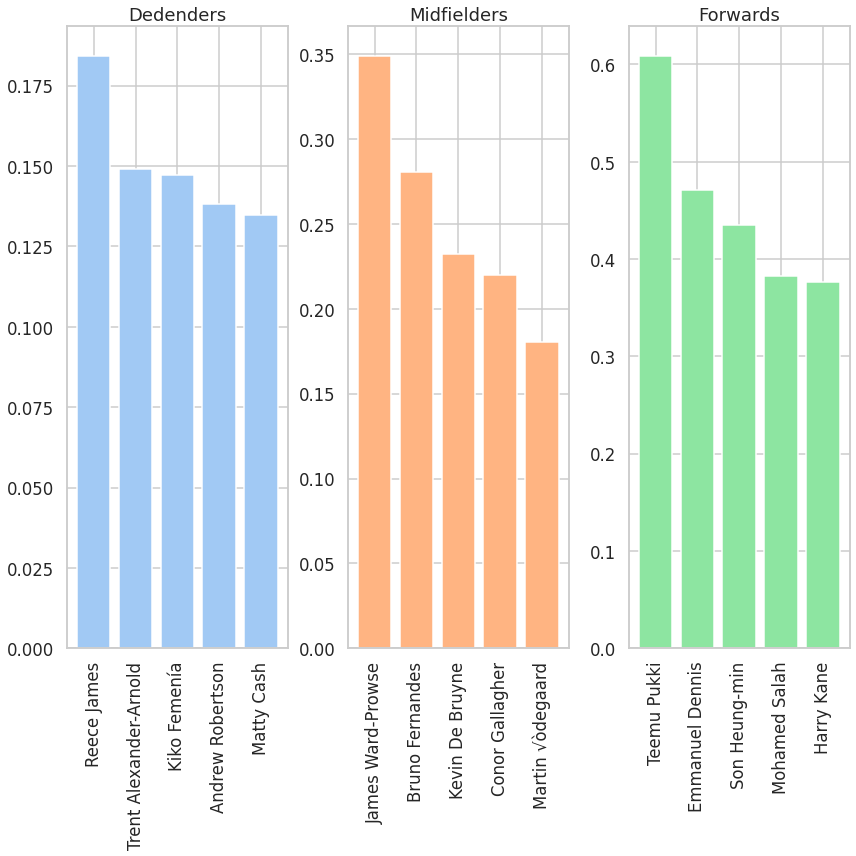

In [136]:
# Define plot space
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 12))

colors = sns.color_palette('pastel')[0:3]

# fig.suptitle("Most contribution of player by position", fontsize = 16)

# Define x and y axes
ax1.bar(top_overall_DF['Player'], top_overall_DF["Gls/Total"], color=colors[0])

# Set plot title and axes labels
ax1.set(title = "Dedenders")

plt.sca(ax1)
plt.xticks(rotation='vertical')

# Define x and y axes
ax2.bar(top_overall_MF['Player'], top_overall_MF["Gls/Total"], color=colors[1])

# Set plot title and axes labels
ax2.set(title = "Midfielders")

plt.sca(ax2)
plt.xticks(rotation='vertical')

# Define x and y axes
ax3.bar(top_overall_FW['Player'], top_overall_FW["Gls/Total"], color=colors[2])

# Set plot title and axes labels
ax3.set(title = "Forwards")

plt.sca(ax3)
plt.xticks(rotation='vertical')

fig.tight_layout()
plt.show()

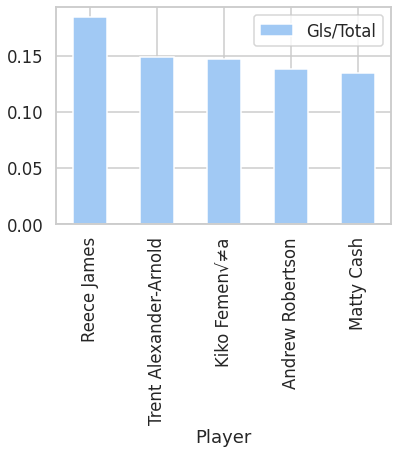

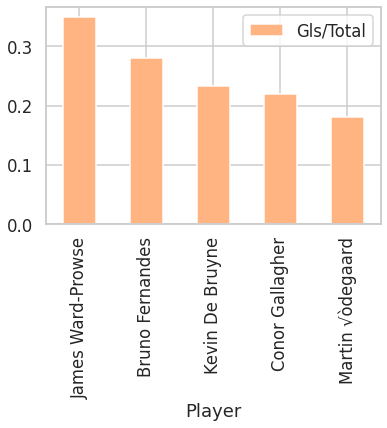

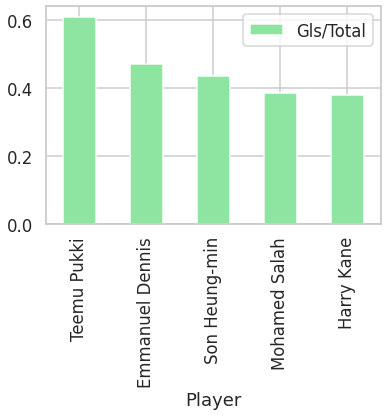

In [105]:
dfs_to_plot = [top_overall_DF, top_overall_MF, top_overall_FW]

for i,df,c in enumerate(zip(dfs_to_plot, colors)):
  df.plot.bar(y=["Gls/Total"], x='Player', color=c)
  plt.show()

which players scored the max out of his xgs